# Big Mart Sales Problem 

Big Mart Sales Problem Data Description:

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

In this Dataset we have to data points Train.csv, Test.csv.

Now we will import out train.csv after model evaluation we will introduce test.csv and we will predict the sales using independent variables

### Here we start the project by importing essential Libraries for Importing Datasets, EDA, Data Cleaning, Model Building, Removing Outliers, Skewness and Predicting the Big Mart Sales

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import joblib
import warnings
from scipy.stats import zscore
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import power_transform, LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
warnings.filterwarnings('ignore')
%matplotlib inline

As we have completed importing of Essesential Libraries not we will import the data and look at the data closely

In [2]:
#here we are importing the data using pandas.read_csv()method and saving it in ds varible
ds = pd.read_csv("~/Desktop/Datatrained/Big Mart Sales Problem/bigdatamarttrain.csv")

Now we will see the first 5 rows of the dataset using ds.head()

In [3]:
ds.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


from here we can see the dataset is a mixture of object, float64, int64 datatypes lets see the count of datatype using ds.info() it will give all the infromation about the data

In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


from above we can see that there are 12 columns and 8253 rows in the data from above we can also see some column has missing data the columns are Item_Weight, Outlet Size

There are 4 float64 data, 1 int64 and 7 object types

now lets see the missing values in the dataset

In [5]:
ds.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

from above we can see that there are 1463, 2410 missing values in the respective columns Item_Weight, Outlet_Sales


so lets visualize the above missing value using heatmap

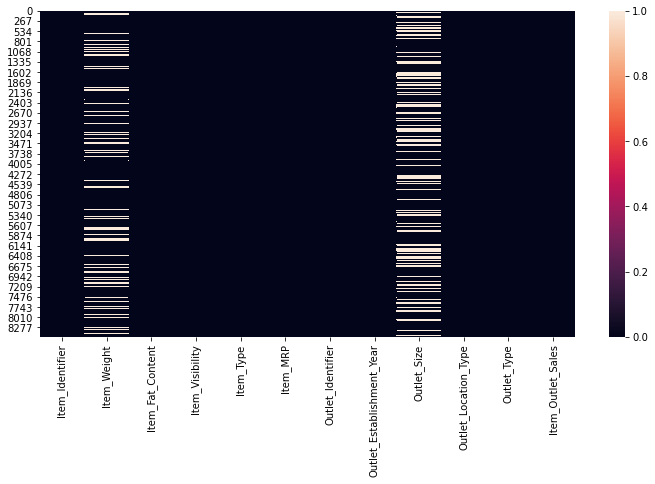

In [6]:
plt.figure(figsize = (12,6))
sns.heatmap(ds.isnull())

From above visualization we can also see that there are missing values in 2 columns that are 'Item_weigth' and outlet_size

Lets see the shape of the data using ds.shape

In [7]:
r, c = ds.shape
print("Number of rows are {}, and columns are {}".format(r, c))

Number of rows are 8523, and columns are 12


from above we can see that there are 8523 rows and 12 columns in the dataset

Lets see some stastics about the data using ds.describe()

In [8]:
ds.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


from above we can only see stastics for numeric columns

lets visualize the Stastical Info using heatmap

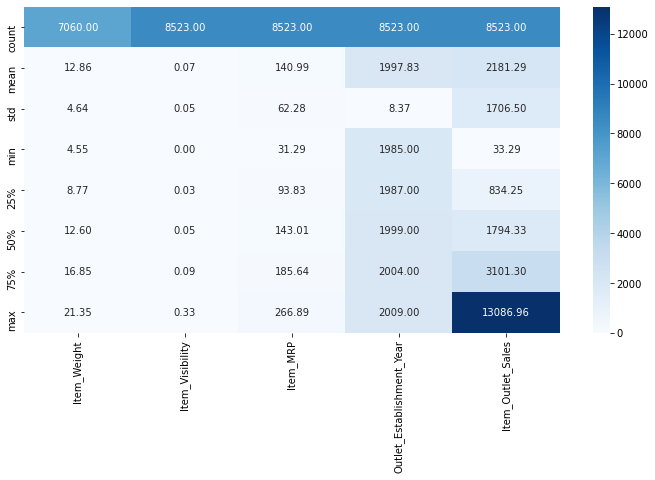

In [9]:
plt.figure(figsize = (12,6))
sns.heatmap(ds.describe(), annot= True, cmap='Blues', fmt = '.2f')

From above we can figure out that the Item_outlet_sales have a huge value in it 13086.96 maybe it can be a outlier we will see it in later part of the project

### Lets start data Preprocessing 

In [10]:
ds.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Now we have to fix the missing values using mean, median or mode of the data as Item weight is numeric value we will use one method between mean, median lets check if the data has outlier or not

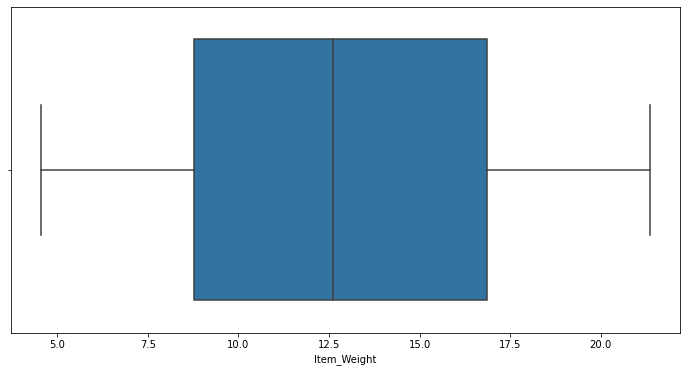

In [11]:
plt.figure(figsize = (12,6))
sns.boxplot(ds['Item_Weight'])

From above we can see that the data don't have any outlier so now we will replace all the null values using mean method

Lets us check all the categorical variable also

In [12]:
cat_col = []
for x in ds.dtypes.index:
    if ds.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [13]:
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

We have removed both the columns as they are not giving us more info

In [14]:
for col in cat_col:
    print(col)
    print(ds[col].value_counts())
    print()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int6

From here we can see that there are multiple variable for Low Fat are Regular we will fix it 

In [15]:
item_weight_mean = ds.pivot_table(values = "Item_Weight", index = 'Item_Identifier')
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [16]:
miss_bool = ds['Item_Weight'].isnull()
miss_bool

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [17]:
for i, item in enumerate(ds['Item_Identifier']):
    if miss_bool[i]:
        if item in item_weight_mean:
            ds['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            ds['Item_Weight'][i] = np.mean(ds['Item_Weight'])

In [18]:
ds['Item_Weight'].isnull().sum()

0

So we have fixed it using mean

Now let us fix the outlet size column

In [19]:
outlet_size_mode = ds.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [20]:
miss_bool = ds['Outlet_Size'].isnull()
ds.loc[miss_bool, 'Outlet_Size'] = ds.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [21]:
ds['Outlet_Size'].isnull().sum()

0

From above we can see that we have also fixed the column Outlet_Size using mode of that column

In [22]:
ds.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Now we can see that the column Item_Visibility has rows with 0 it is not possible so we will also change the data to mean where it is zero

In [23]:
sum(ds['Item_Visibility']==0)

526

There are 526 rows with 0 values let us consider it as missing and fixit using mean

In [24]:
ds.loc[:, 'Item_Visibility'].replace([0], [ds['Item_Visibility'].mean()], inplace=True)

In [25]:
ds.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [26]:
sum(ds['Item_Visibility']==0)

0

Now we can see that we have fixed all the 0 rows with the mean of the column

Now its time for Low Fat, LF, low fat, Regular, reg to merge it into one another

In [27]:
ds['Item_Fat_Content'] = ds['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
ds['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

From above we can see we have combined all the duplicate varible,

In [28]:
ds.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


So now let us add a new column which has rows named as Food, Drinks, Non Consumable by using the Item_Identifier

In [29]:
ds['New_Item_Type'] = ds['Item_Identifier'].apply(lambda x: x[:2])
ds['New_Item_Type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [30]:
ds['New_Item_Type'] = ds['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
ds['New_Item_Type'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_Type, dtype: int64

We have successfully converted all the food type into our new table

In [31]:
ds.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable


In [32]:
ds.loc[ds['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
ds['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [33]:
ds.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable


### Lets start with EDA process 

In [34]:
columns = ['Item_Fat_Content', 'Item_Type','Outlet_Identifier','Outlet_Establishment_Year', 'Outlet_Size','Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type']

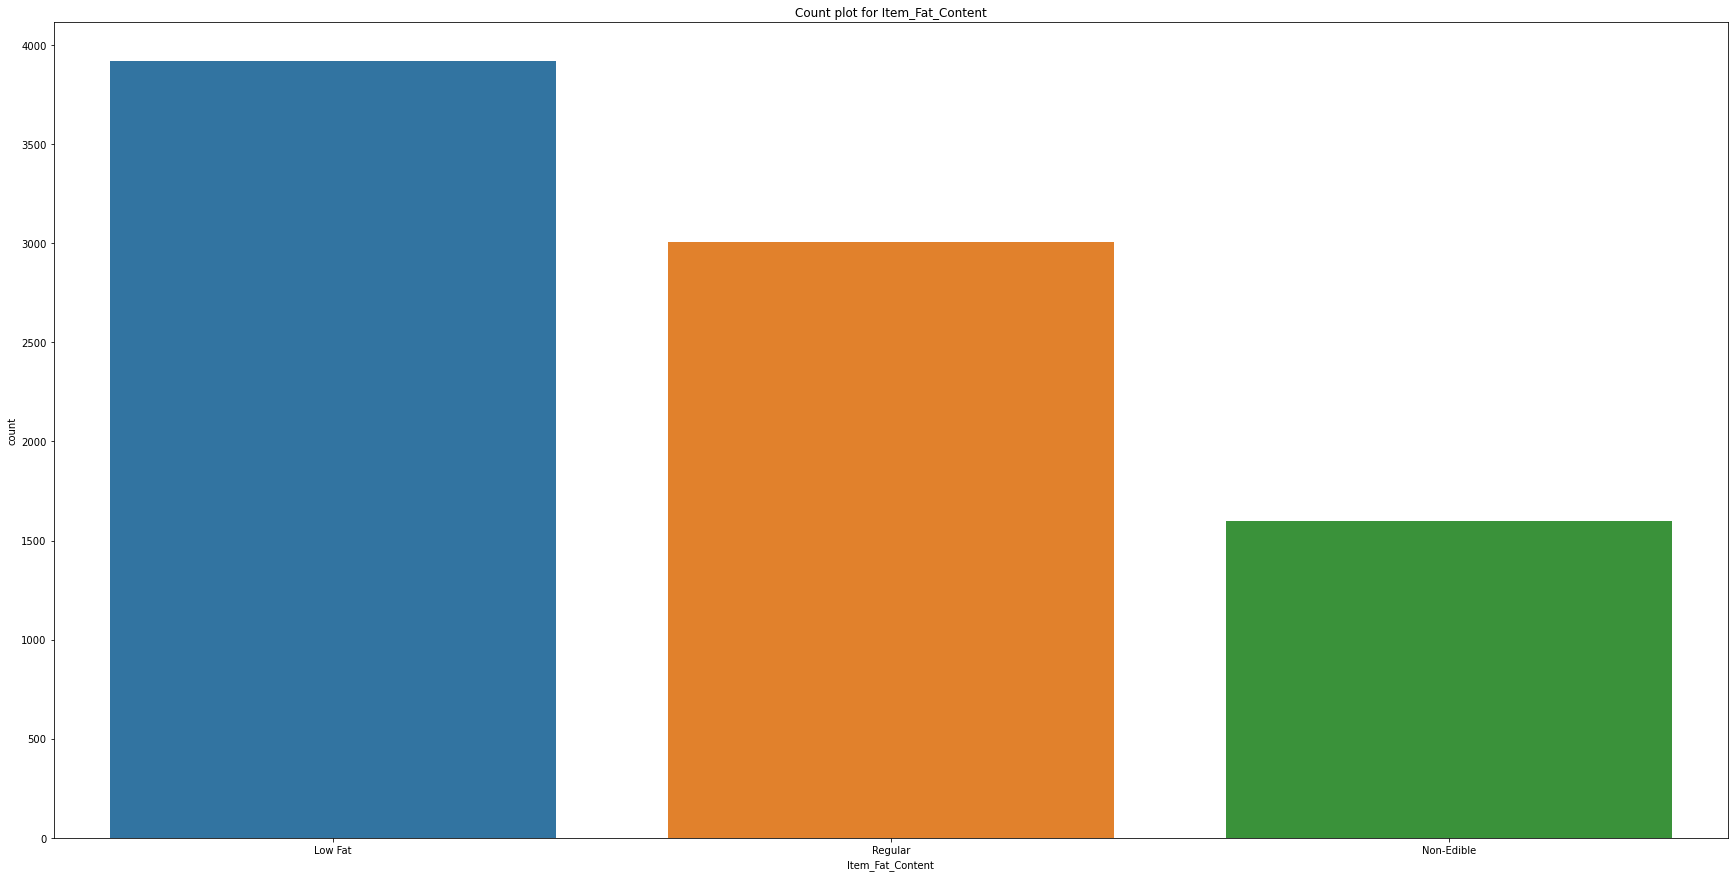

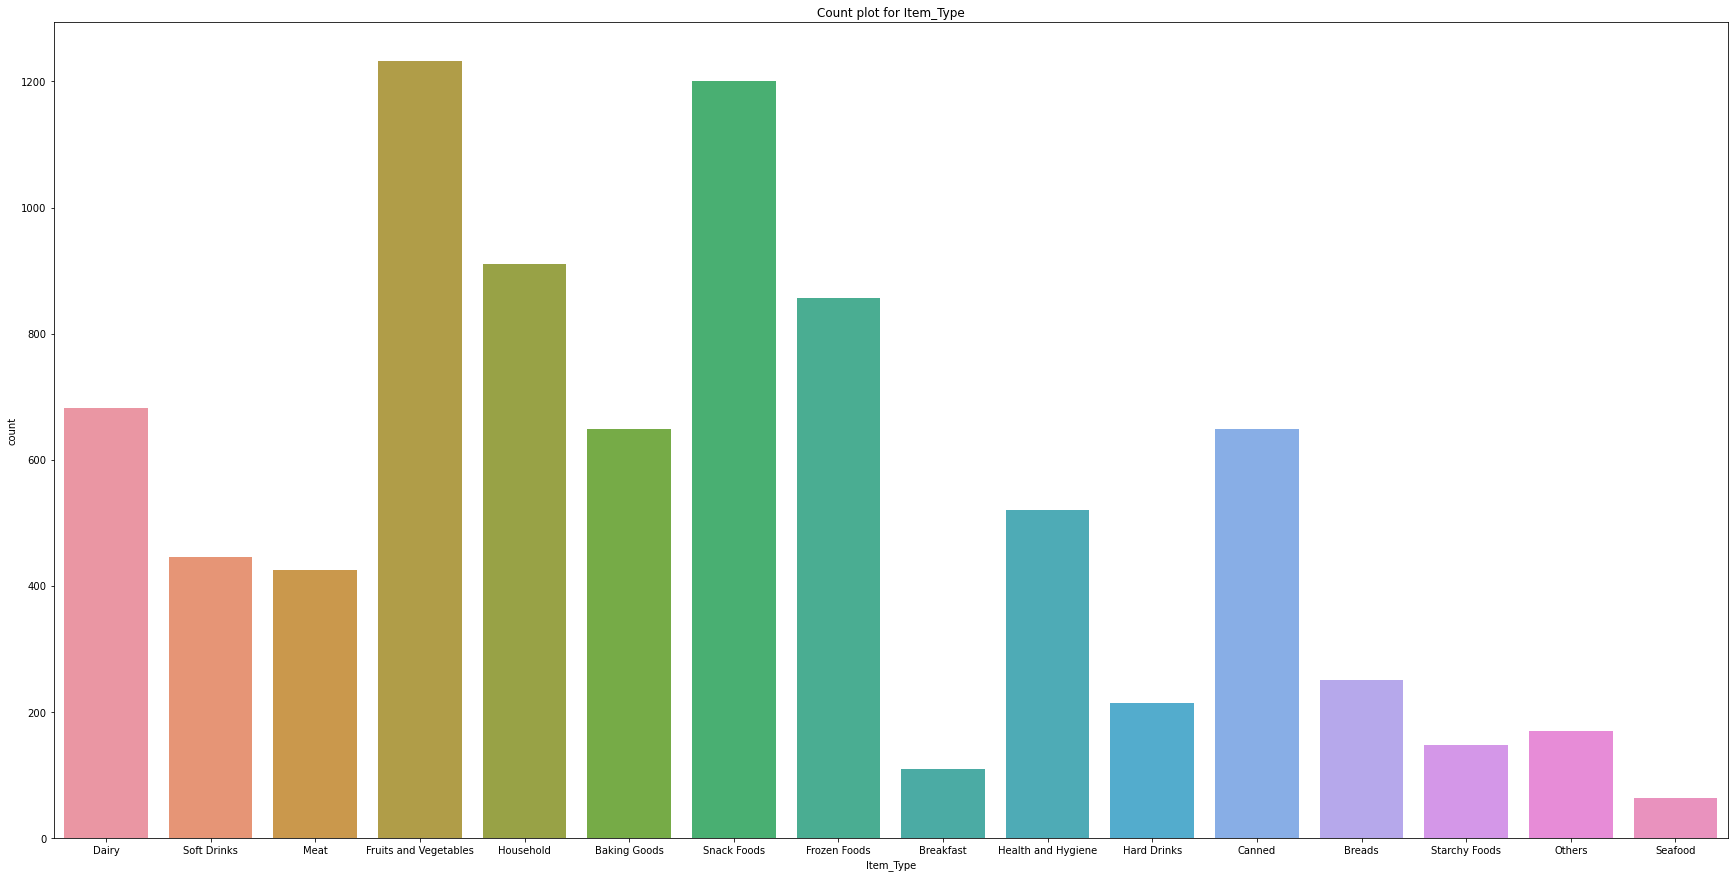

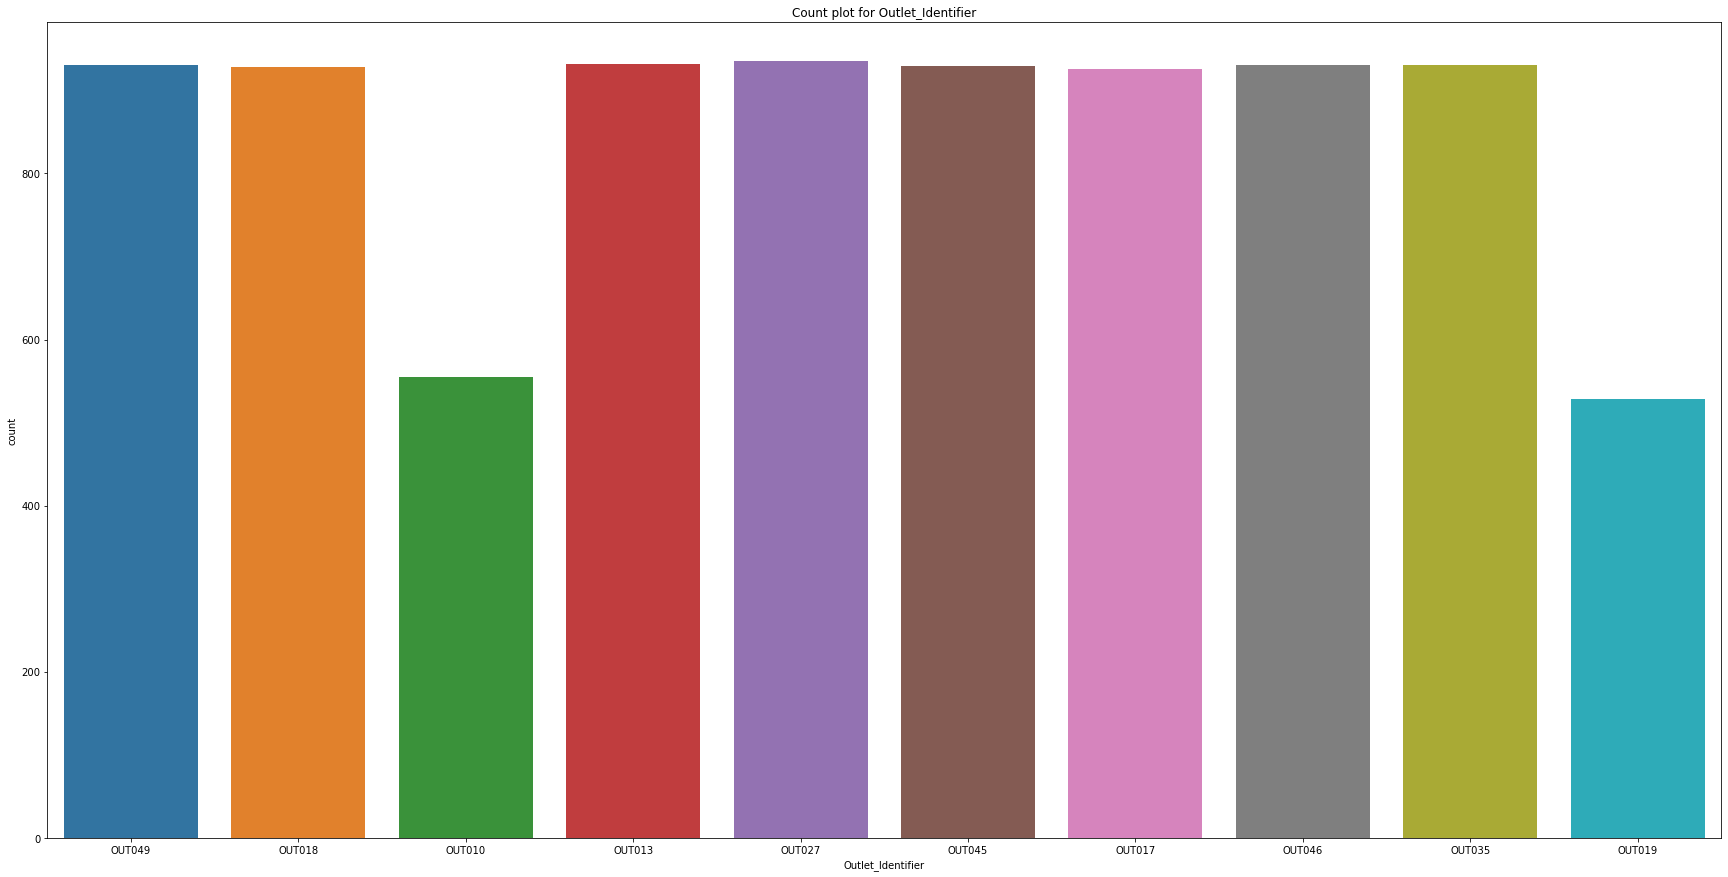

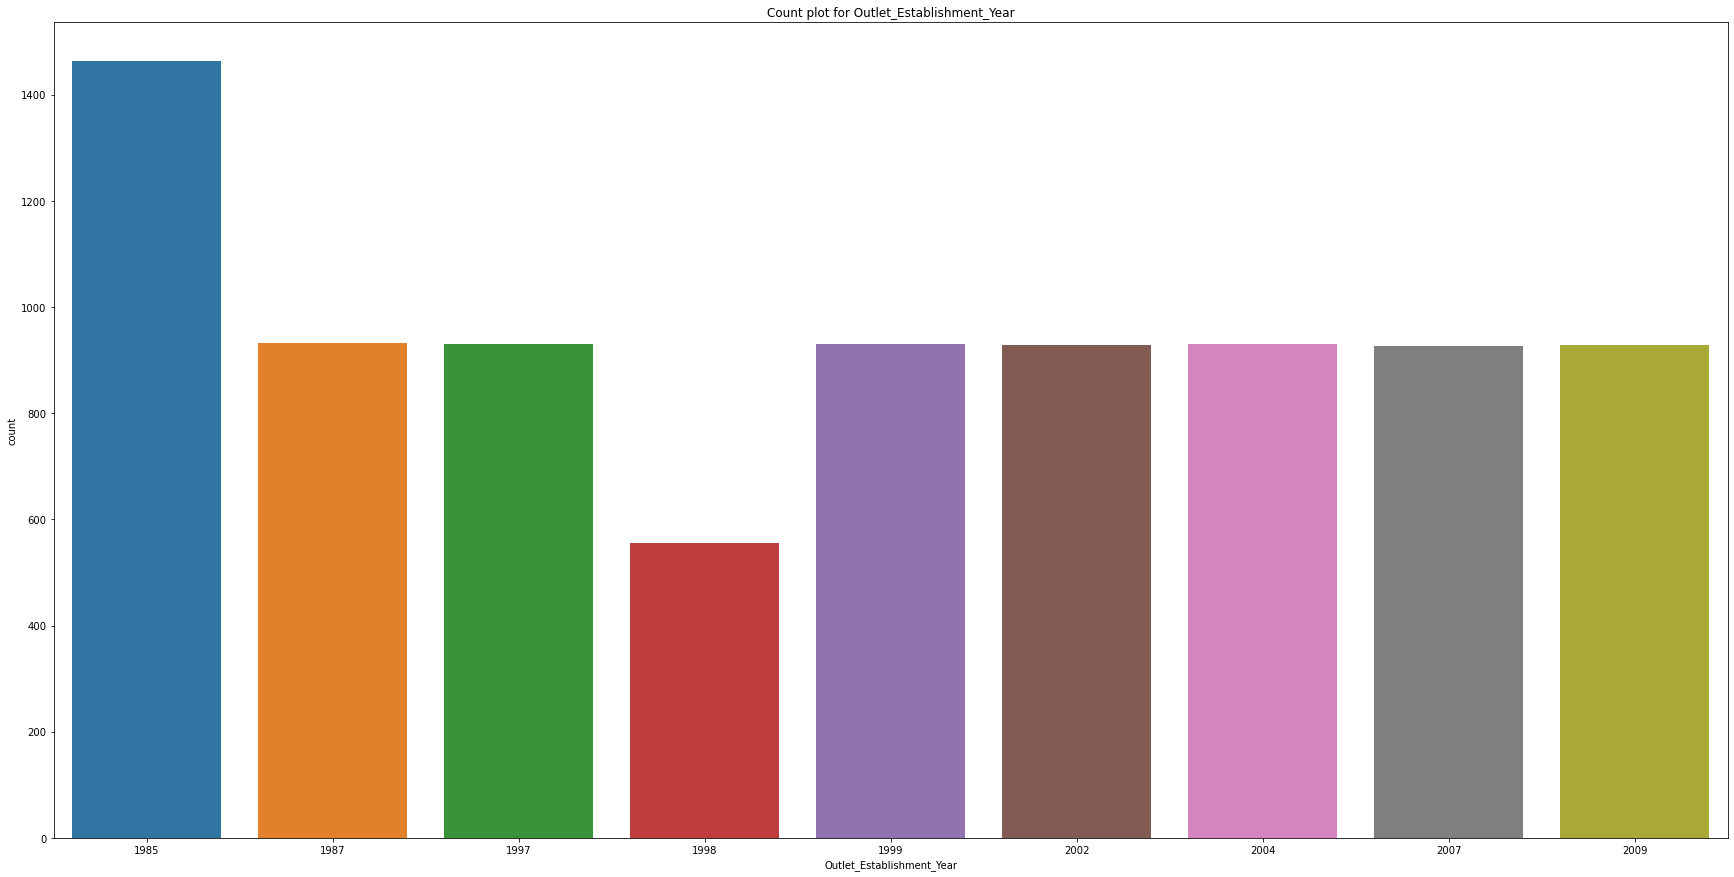

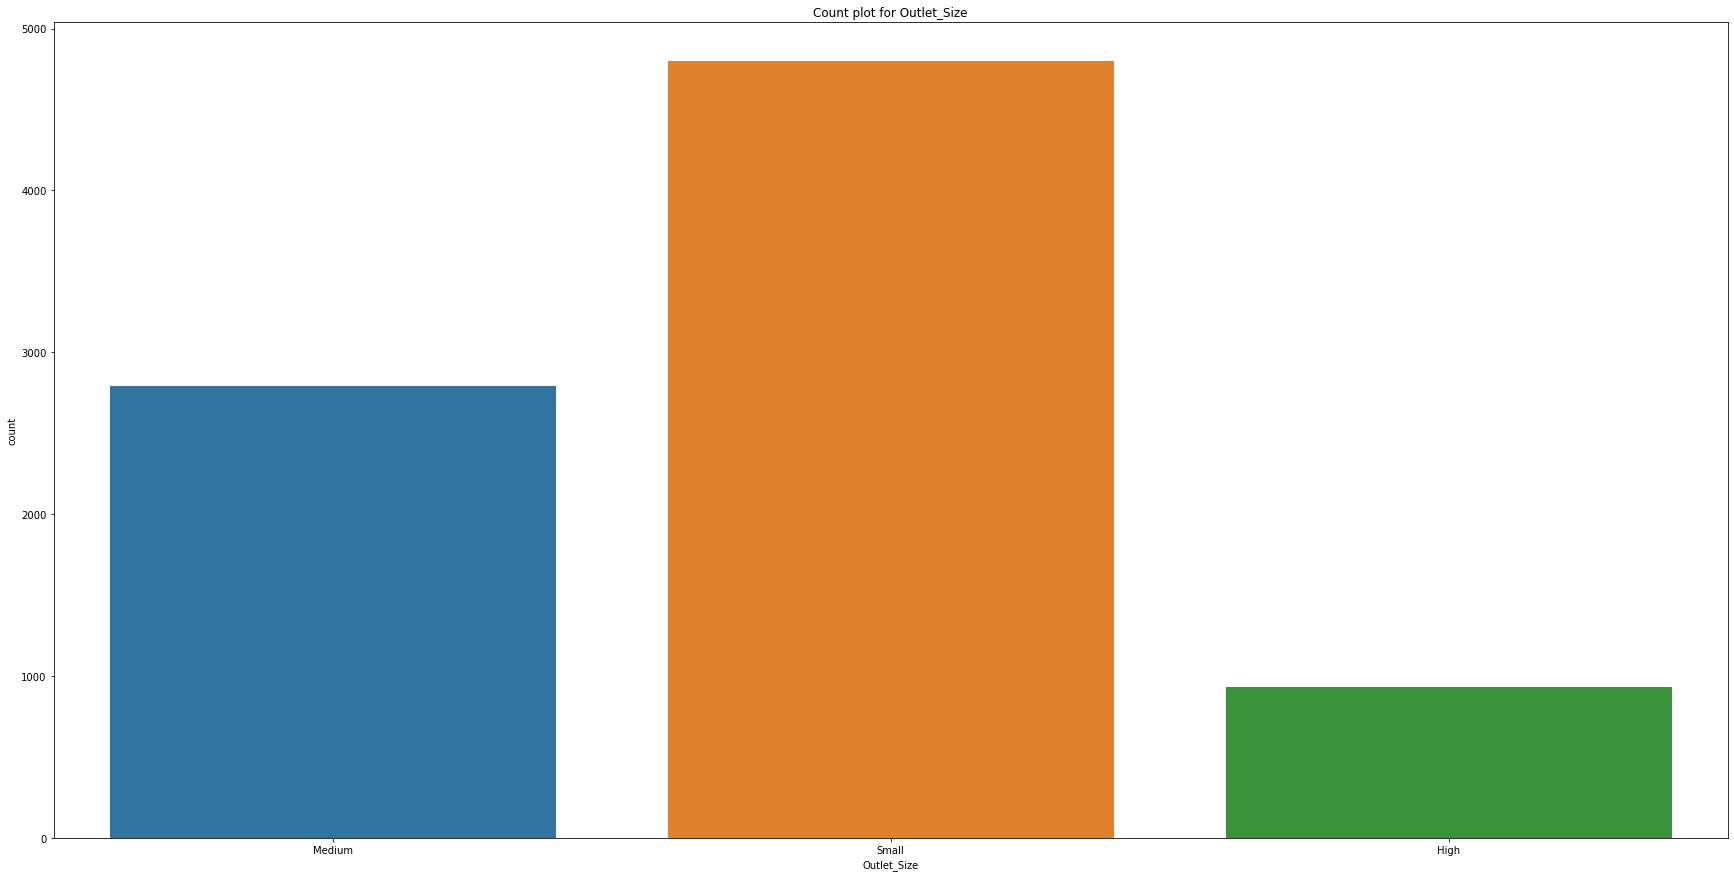

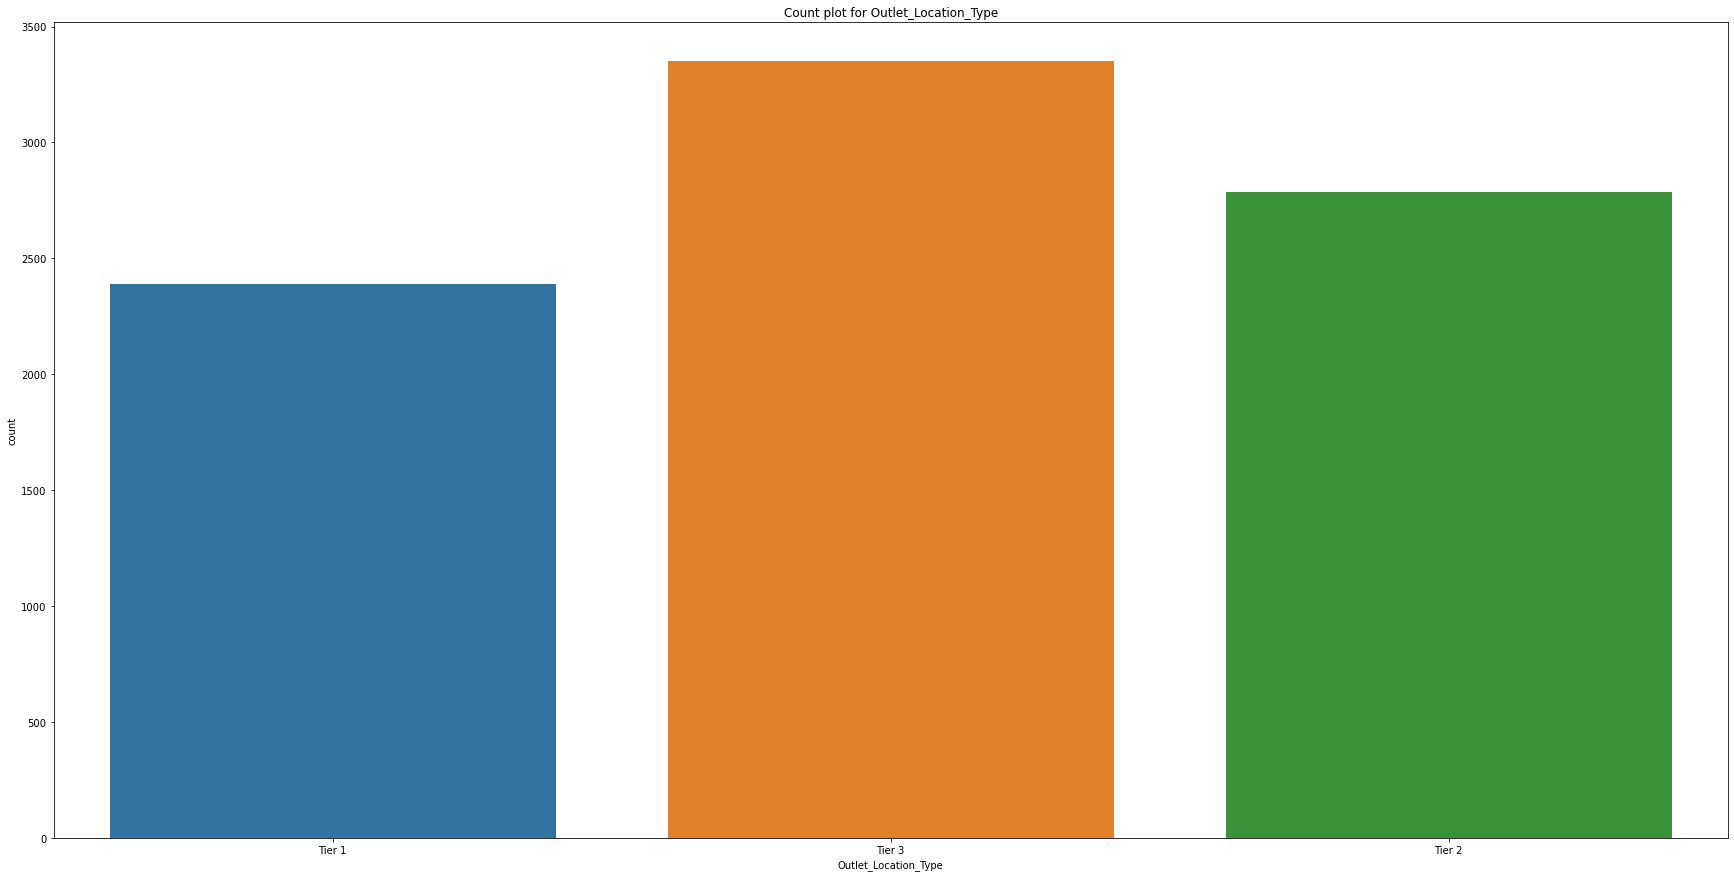

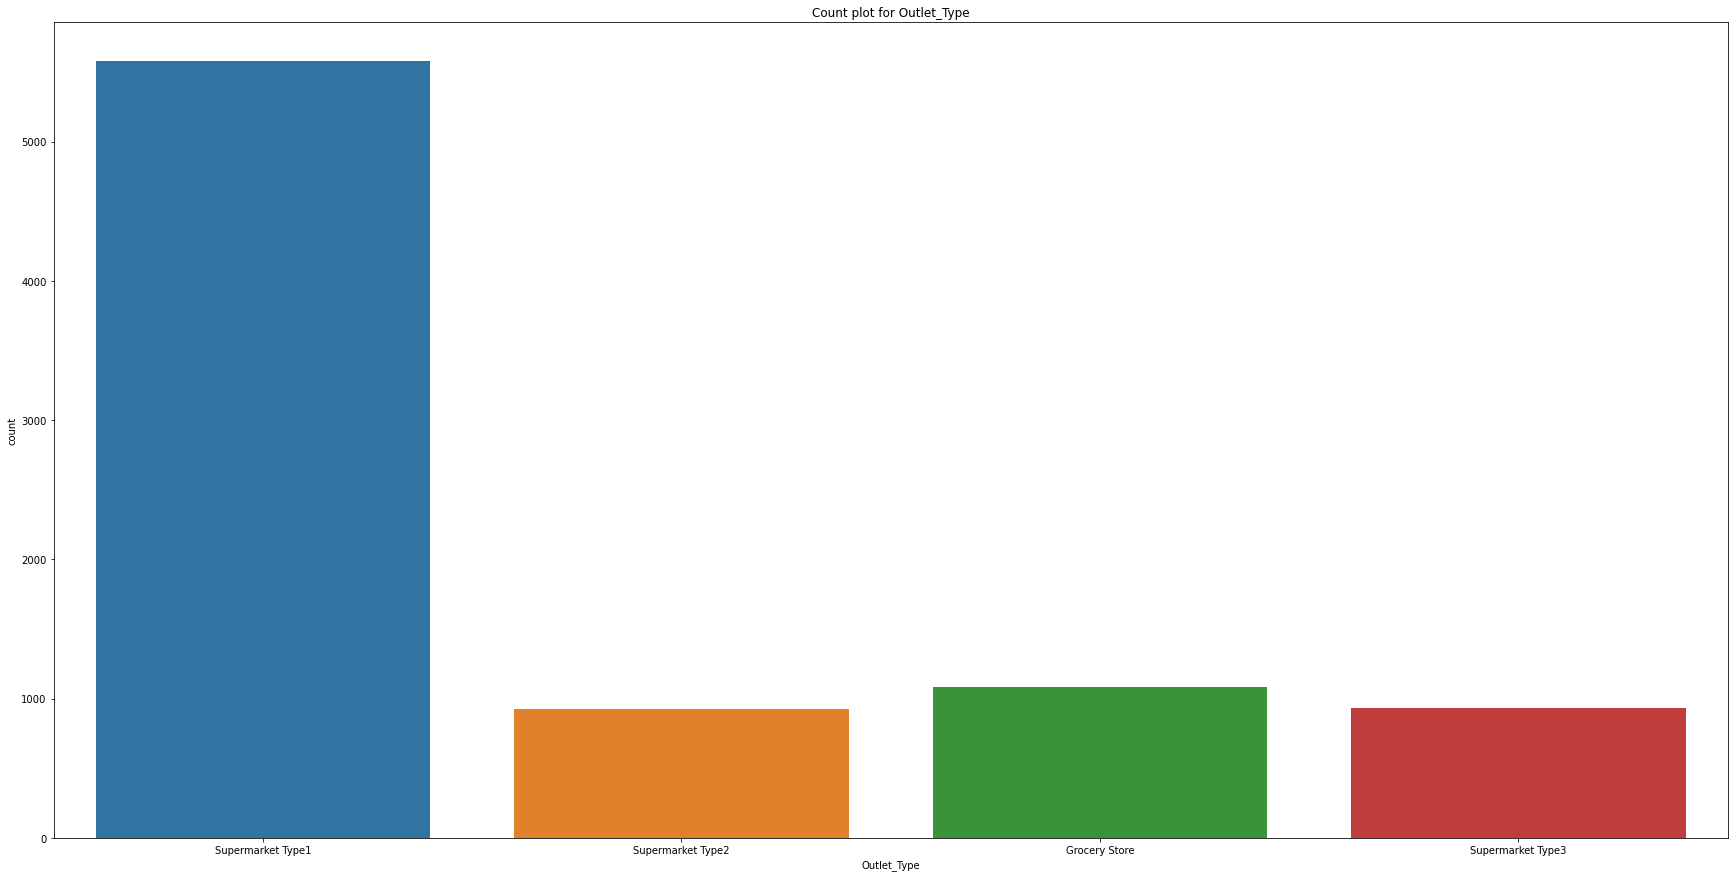

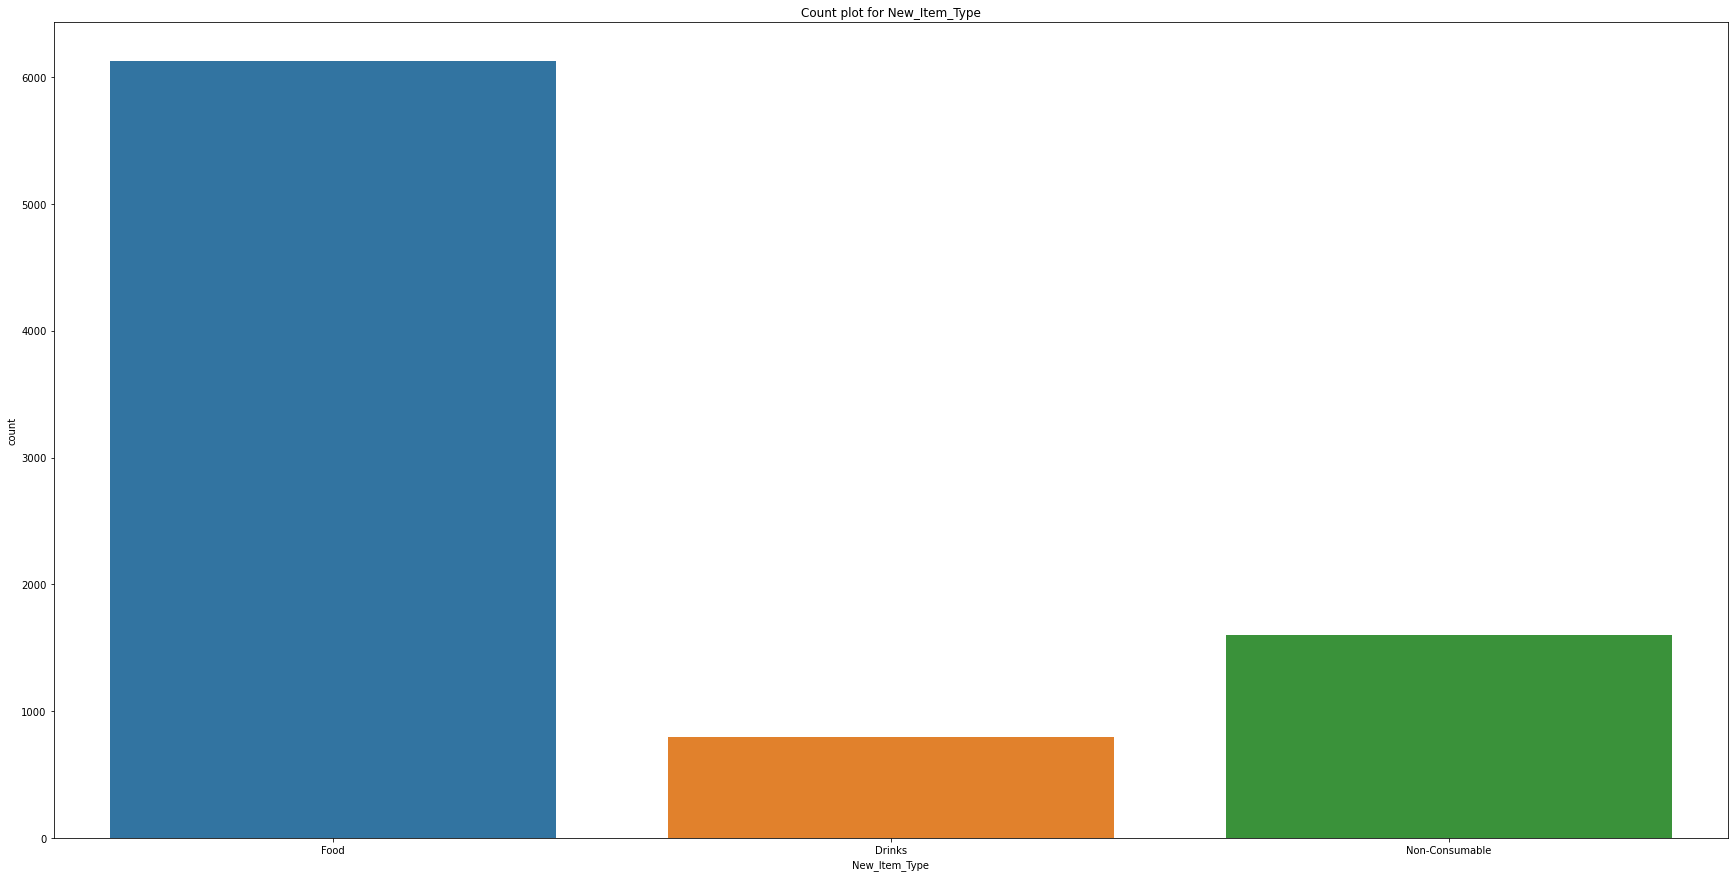

In [35]:
for c in columns:
    plt.figure(figsize = (30,15))
    plt.title("Count plot for {}".format(c))
    sns.countplot(ds[c])

From above we can see the count of every columns which has categories

From above graphs we can see what type are food are avaliable in the dataset

In [36]:
ds.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable


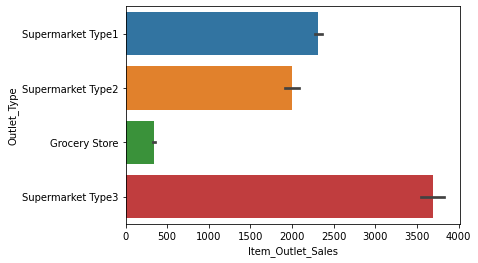

In [37]:
sns.barplot(ds['Item_Outlet_Sales'], ds['Outlet_Type'])

From we can see that the type3 supermarket has the heighest sales than rest of them and the least sale is for grocery store

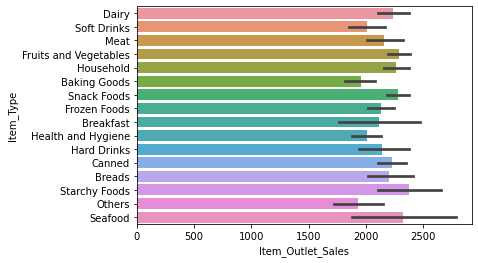

In [38]:
sns.barplot(ds['Item_Outlet_Sales'], ds['Item_Type'])

From here we can see most of the people are buying starchfood and seafood so if we keep it we will generate more revenue

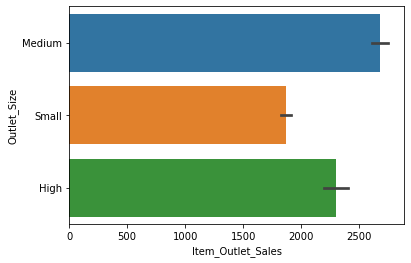

In [39]:
sns.barplot(ds['Item_Outlet_Sales'], ds['Outlet_Size'])

People Visits Medium Size outlet more than Large and Small

Now lets check the correlation of the dataset using ds.corr()

In [40]:
ds.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.017450,0.024756,-0.008301,0.011550
Item_Visibility,-0.017450,1.000000,-0.005259,-0.078355,-0.134138
Item_MRP,0.024756,-0.005259,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.078355,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.134138,0.567574,-0.049135,1.000000


Lets visualize teh correlation of the dataset

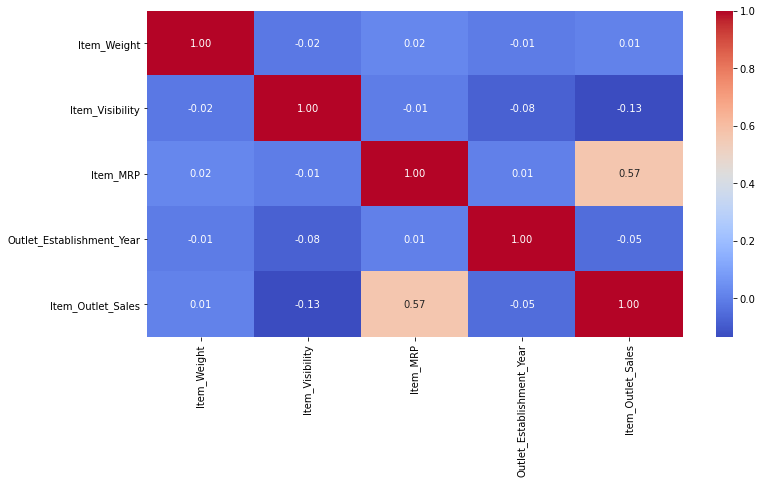

In [41]:
plt.figure(figsize = (12,6))
sns.heatmap(ds.corr(), annot= True, cmap='coolwarm', fmt='.2f')

we can see the more the column is red it has thar much correlation

Lets see the density of the dataset using sns.distplot

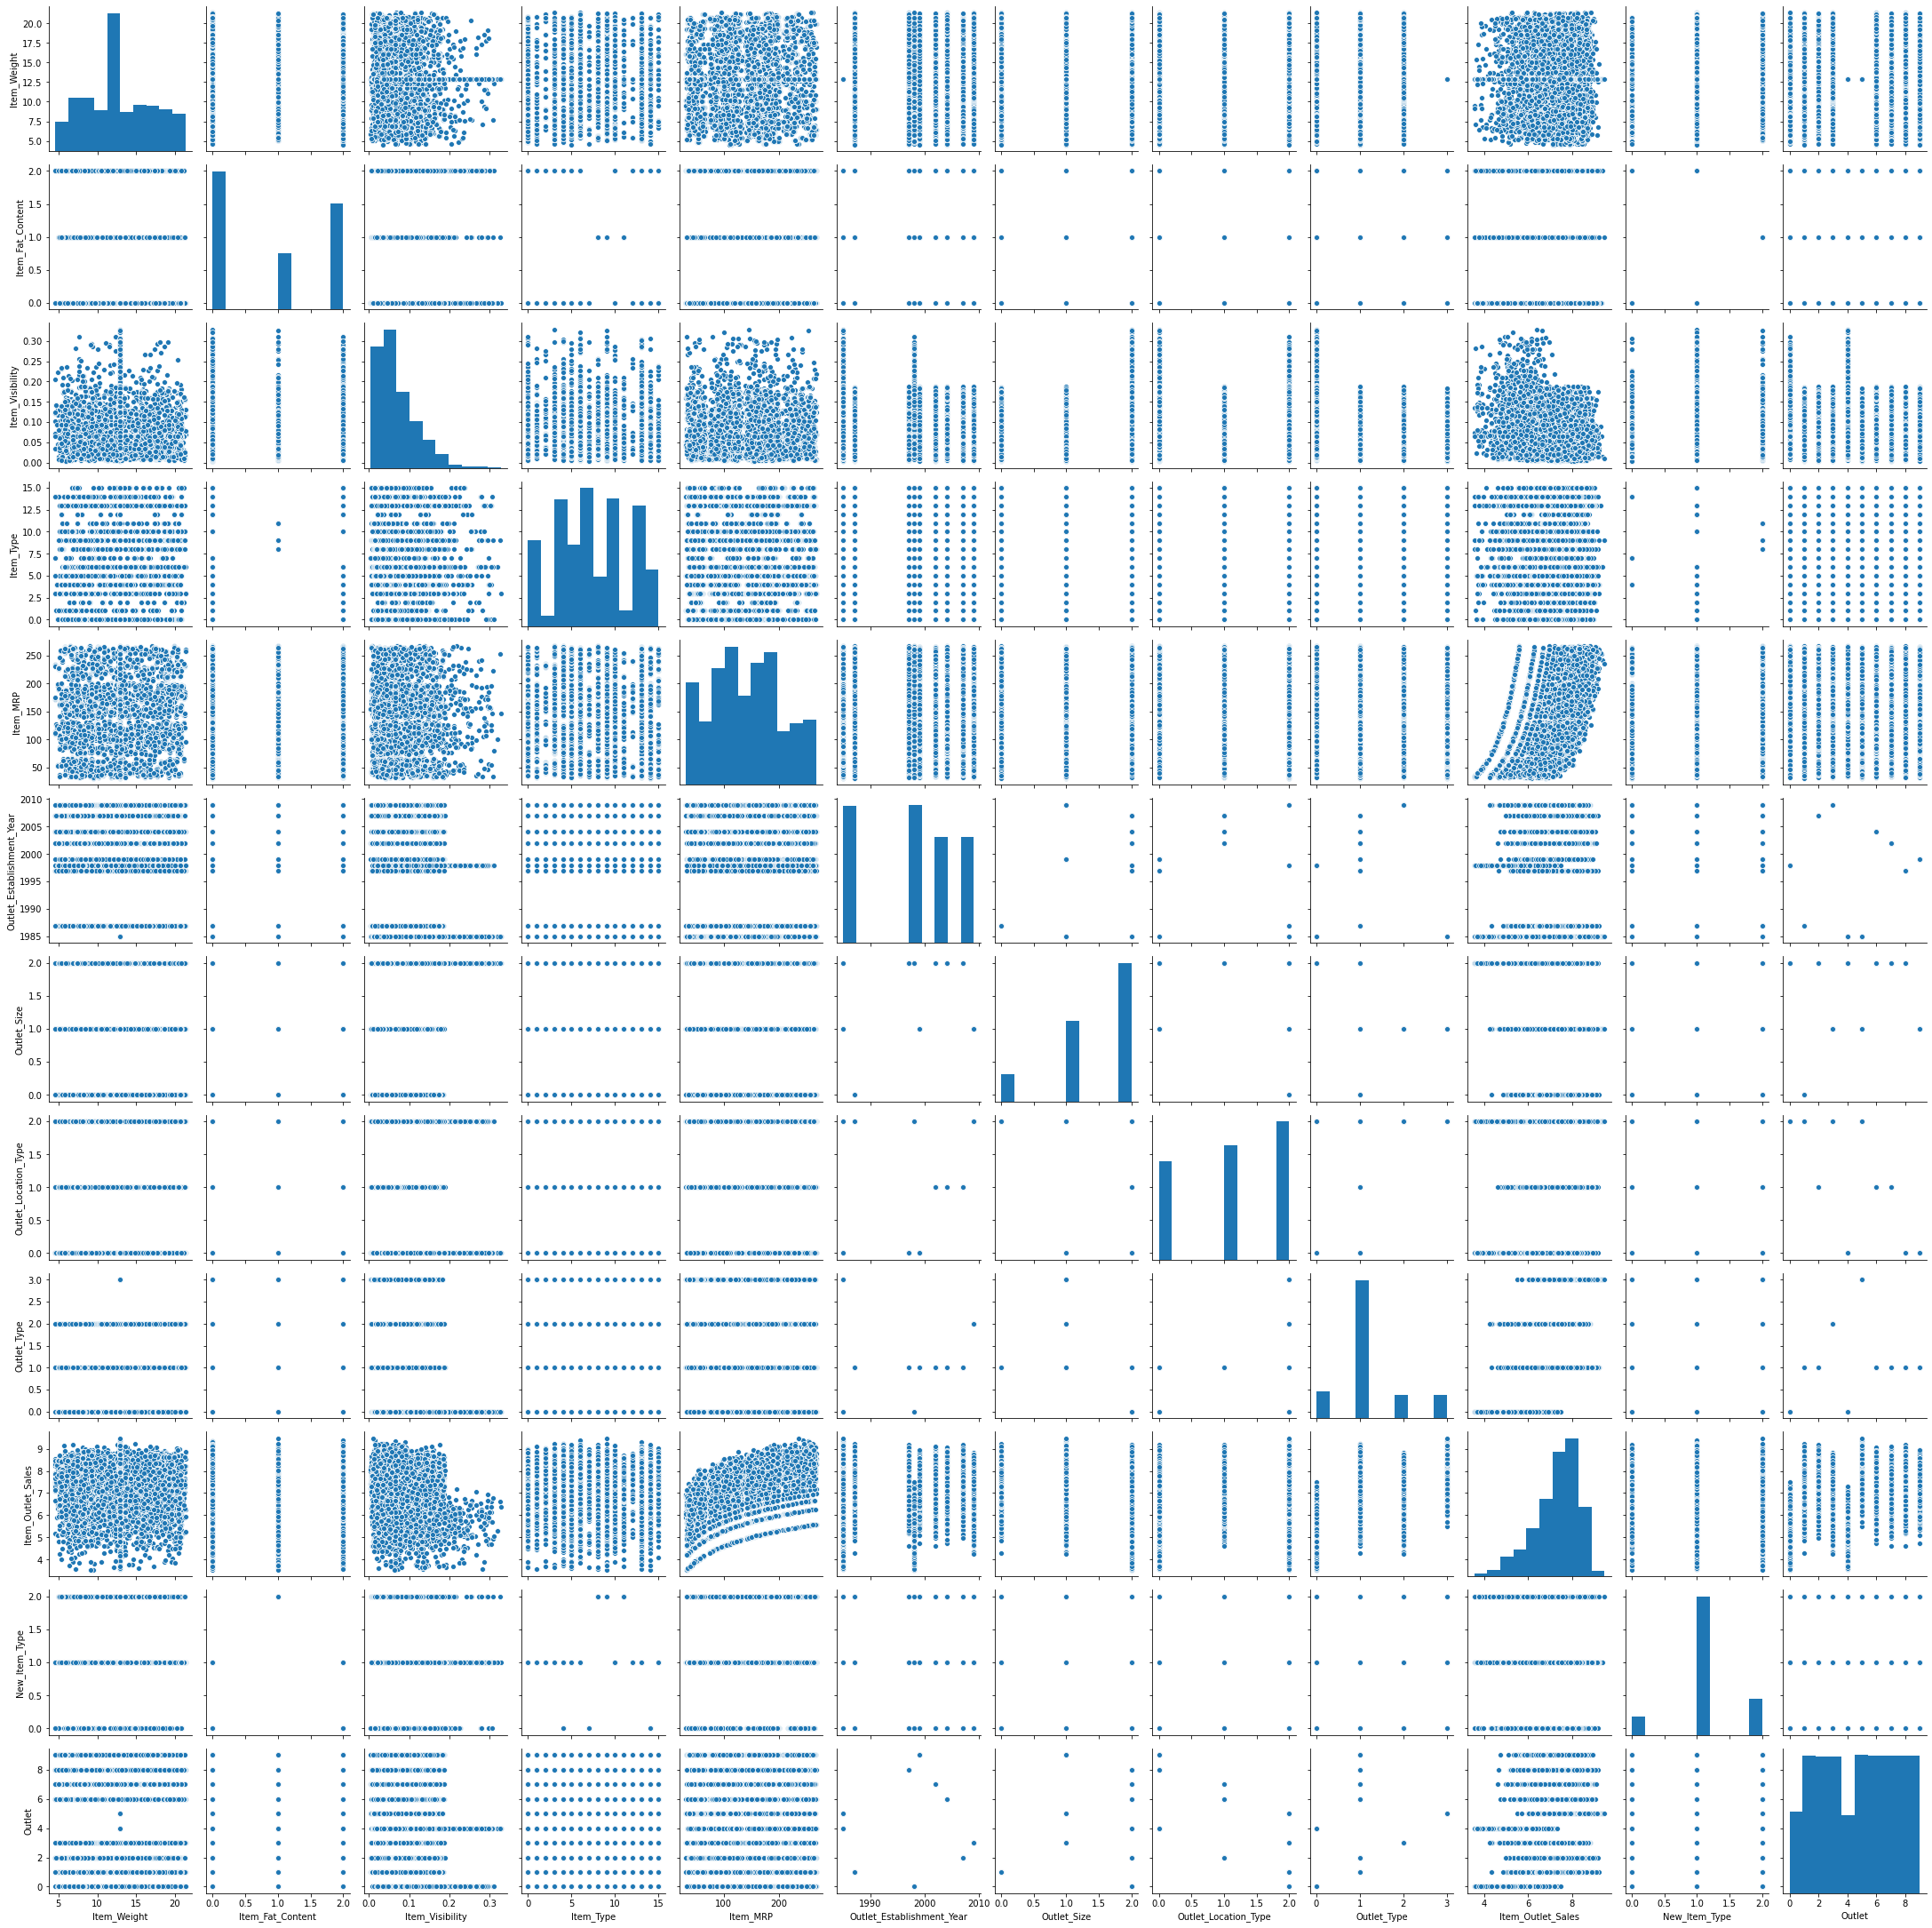

In [73]:
sns.pairplot(ds)

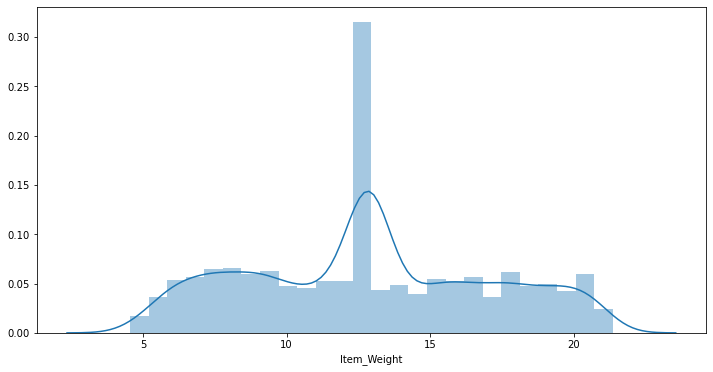

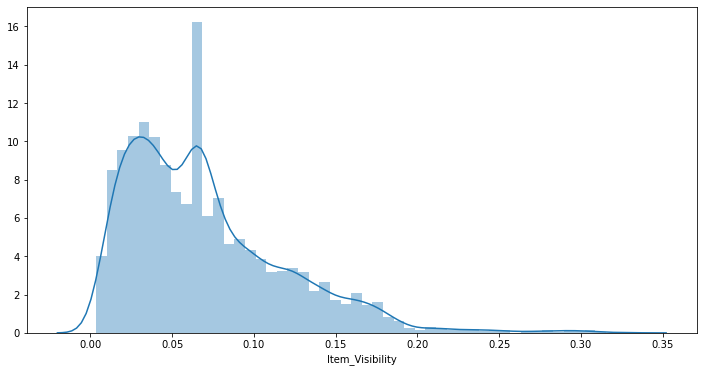

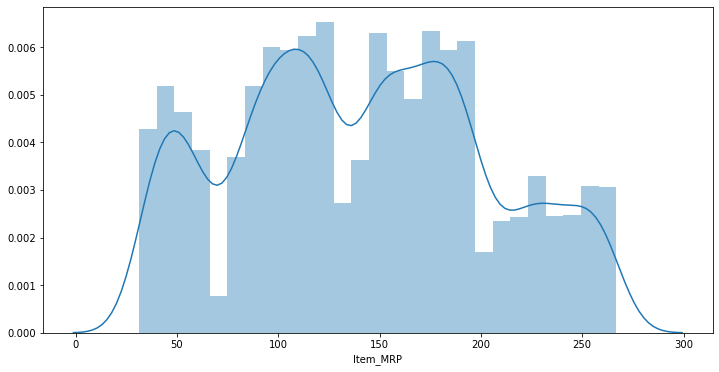

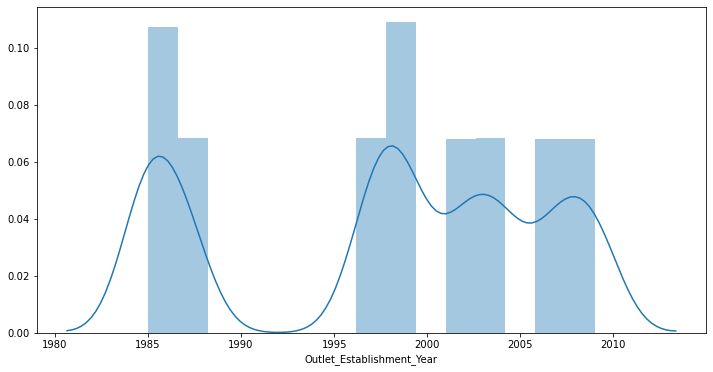

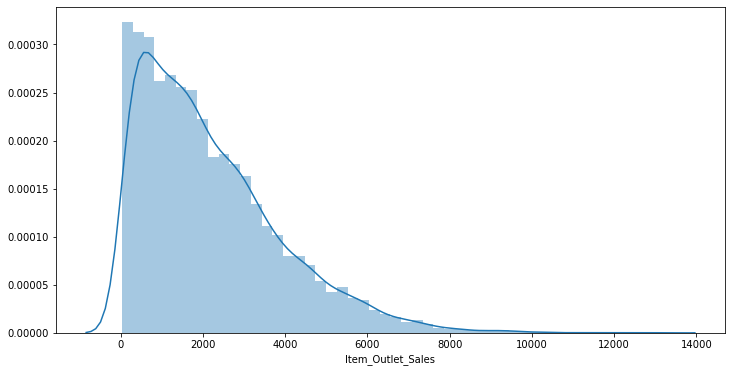

In [42]:
columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']
for c in columns:
    plt.figure(figsize = (12,6))
    sns.distplot(ds[c])

We can see the skewness in the data lets fix our dependent variable Item_outlet_sales using log transformation because it is positive

In [43]:
ds['Item_Outlet_Sales'] = np.log(1+ds['Item_Outlet_Sales'])

In [44]:
ds.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.225808,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.096776,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.648868,Food
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,6.597664,Food
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.903451,Non-Consumable


As there are more number of object varible in dataset we will do encoding to it so that it will convert into numeric value and it will be easy to pass it in model

In [45]:
le = LabelEncoder()
ds['Outlet'] = le.fit_transform(ds['Outlet_Identifier'])
cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type']
for col in cat_col:
    ds[col] = le.fit_transform(ds[col])

In [46]:
ds.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,8.225808,1,9
1,DRC01,5.92,2,0.019278,14,48.2692,OUT018,2009,1,2,2,6.096776,0,3
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,7.648868,1,9
3,FDX07,19.20,2,0.066132,6,182.0950,OUT010,1998,2,2,0,6.597664,1,0
4,NCD19,8.93,1,0.066132,9,53.8614,OUT013,1987,0,2,1,6.903451,2,1


Now lets do One Hot encoding too for the same columns

In [47]:
dsnew = pd.get_dummies(ds, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'])
dsnew.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet,Item_Fat_Content_0,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,FDA15,9.30,0.016047,4,249.8092,OUT049,1999,8.225808,9,1,...,1,0,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,14,48.2692,OUT018,2009,6.096776,3,0,...,0,0,1,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,10,141.6180,OUT049,1999,7.648868,9,1,...,1,0,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.066132,6,182.0950,OUT010,1998,6.597664,0,0,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.93,0.066132,9,53.8614,OUT013,1987,6.903451,1,0,...,0,0,1,0,1,0,0,0,0,1


now lets drop remaning columns that dosen't help us predicting the sales

In [48]:
dsnew.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'], axis = 1, inplace=True)

In [49]:
dsnew

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Item_Outlet_Sales,Outlet,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Size_0,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,9.300,0.016047,4,249.8092,8.225808,9,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,5.920,0.019278,14,48.2692,6.096776,3,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
2,17.500,0.016760,10,141.6180,7.648868,9,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,19.200,0.066132,6,182.0950,6.597664,0,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
4,8.930,0.066132,9,53.8614,6.903451,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,13,214.5218,7.929984,1,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0
8519,8.380,0.046982,0,108.1570,6.310436,7,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
8520,10.600,0.035186,8,85.1224,7.085159,6,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
8521,7.210,0.145221,13,103.1332,7.521100,3,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0


As we have successfully dropped the unwanted columns now we can proceed with spliting the data in independent and dependent variable

In [50]:
X = dsnew.drop('Item_Outlet_Sales', axis = 1)
Y = ds['Item_Outlet_Sales']

let's Scale the values

In [51]:
sc = StandardScaler()

In [52]:
Xnew = sc.fit_transform(X)
Xnew = pd.DataFrame(Xnew, columns = X.columns)

In [53]:
X = Xnew

As there are only 21 column there is no need of PCA we will now do train test split of data

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.22, random_state = 42)

lets fit a algorithm and see what is the accuracy score and then we will find the best accuracy score for that model

In [55]:
lr = LinearRegression()
lr.fit(X_train, Y_train)
lr.score(X_train, Y_train)

0.7174449445943969

In [56]:
predlr = lr.predict(X_test)
print("Accuracy :", r2_score(Y_test, predlr))
print("Mean Squared Error:", mean_squared_error(Y_test, predlr))
print("Mean Absolute Error:", mean_absolute_error(Y_test, predlr))

Accuracy : 0.7272541903174485
Mean Squared Error: 0.28873039077137574
Mean Absolute Error: 0.4170694673691459


So we are getting 73% accuracy for Linear Regression at Random State 42 lets find out the best Random state for all the algorithms and fit them accordingly

In [57]:
maxacc = 0
maxrs = 0
for i in range(0,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.22, random_state = i)
    lr = LinearRegression()
    lr.fit(X_train, Y_train)
    predlr = lr.predict(X_test)
    acc = r2_score(Y_test, predlr)
    if acc > maxacc:
        maxacc = acc
        maxrs = i
        
print("Maximum Accuracy is {} at Random State {} for Linear regression ".format(maxacc, maxrs))

Maximum Accuracy is 0.749392158581017 at Random State 3 for Linear regression 


In [58]:
maxacc = 0
maxrs = 0
for i in range(0,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.22, random_state = i)
    lasso = Lasso()
    lasso.fit(X_train, Y_train)
    predls = lasso.predict(X_test)
    acc = r2_score(Y_test, predls)
    if acc > maxacc:
        maxacc = acc
        maxrs = i
        
print("Maximum Accuracy is {} at Random State {} for Lasso ".format(maxacc, maxrs))

Maximum Accuracy is 0 at Random State 0 for Lasso 


In [59]:
maxacc = 0
maxrs = 0
for i in range(0,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.22, random_state = i)
    ridge = Ridge()
    ridge.fit(X_train, Y_train)
    predrg = ridge.predict(X_test)
    acc = r2_score(Y_test, predrg)
    if acc > maxacc:
        maxacc = acc
        maxrs = i
        
print("Maximum Accuracy is {} at Random State {} for Ridge ".format(maxacc, maxrs))

Maximum Accuracy is 0.7492710351670446 at Random State 3 for Ridge 


In [60]:
maxacc = 0
maxrs = 0
for i in range(0,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.22, random_state = i)
    dtc = DecisionTreeRegressor()
    dtc.fit(X_train, Y_train)
    predtc = dtc.predict(X_test)
    acc = r2_score(Y_test, predtc)
    if acc > maxacc:
        maxacc = acc
        maxrs = i
        
print("Maximum Accuracy is {} at Random State {} for Decision Tree ".format(maxacc, maxrs))

Maximum Accuracy is 0.5244539459792559 at Random State 282 for Decision Tree 


In [61]:
maxacc = 0
maxrs = 0
for i in range(0,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.22, random_state = i)
    rfr = RandomForestRegressor()
    rfr.fit(X_train, Y_train)
    predrfr = rfr.predict(X_test)
    acc = r2_score(Y_test, predrfr)
    if acc > maxacc:
        maxacc = acc
        maxrs = i
        
print("Maximum Accuracy is {} at Random State {} for Random Forest ".format(maxacc, maxrs))

Maximum Accuracy is 0.7359055753878887 at Random State 464 for Random Forest 


In [62]:
maxacc = 0
maxrs = 0
for i in range(0,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.22, random_state = i)
    adb = AdaBoostRegressor()
    adb.fit(X_train, Y_train)
    predadb = adb.predict(X_test)
    acc = r2_score(Y_test, predadb)
    if acc > maxacc:
        maxacc = acc
        maxrs = i
        
print("Maximum Accuracy is {} at Random State {} for AdaBoost ".format(maxacc, maxrs))

Maximum Accuracy is 0.7122841846419914 at Random State 478 for AdaBoost 


In [63]:
maxacc = 0
maxrs = 0
for i in range(0,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.22, random_state = i)
    svr = SVR()
    svr.fit(X_train, Y_train)
    predsvr = svr.predict(X_test)
    acc = r2_score(Y_test, predsvr)
    if acc > maxacc:
        maxacc = acc
        maxrs = i
        
print("Maximum Accuracy is {} at Random State {} for SVR ".format(maxacc, maxrs))

Maximum Accuracy is 0.7574296288763349 at Random State 297 for SVR 


In [64]:
maxacc = 0
maxrs = 0
for i in range(0,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.22, random_state = i)
    knn = KNeighborsRegressor()
    knn.fit(X_train, Y_train)
    predknn = knn.predict(X_test)
    acc = r2_score(Y_test, predknn)
    if acc > maxacc:
        maxacc = acc
        maxrs = i
        
print("Maximum Accuracy is {} at Random State {} for KNN ".format(maxacc, maxrs))

Maximum Accuracy is 0.7040241957523069 at Random State 834 for KNN 


So now we have all the accuracy score of the model now we will find the accuracy score after cross validation score and we will check which model performs well

### Cross Validation Score 

In [87]:
scorelr = cross_val_score(lr, X, Y, cv = 5)
scorelr = scorelr.mean()*100
print(scorelr)

71.86068233723117


In [88]:
scorerg = cross_val_score(ridge, X, Y, cv = 5)
scorerg =scorerg.mean()*100
print(scorerg)

71.85959927860259


In [89]:
scorerfr = cross_val_score(rfr, X, Y, cv = 5)
scorerfr = scorerfr.mean()*100
print(scorerfr)

69.66810687252084


In [90]:
scoreadb = cross_val_score(adb, X, Y, cv = 5)
scoreadb = scoreadb.mean()*100
print(scoreadb)

67.78622986862362


In [112]:
scoresvr = cross_val_score(svr, X, Y, cv = 5)
scoresvr = scoresvr.mean()*100
print(scoresvr)

72.30346407442862


In [114]:
scoreknn = cross_val_score(knn, X, Y, cv = 5)
scoreknn = scoreknn.mean()*100
print(scoreknn)

66.18151571835963


Now we will create a dataframe with the accuracy score and accuracy score after cross validation and lets see which model has done well

In [123]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.22, random_state = 3)

In [124]:
lr = LinearRegression()

In [221]:
lr.fit(X_train ,Y_train)
print("Traning score:", lr.score(X_train, Y_train))
predlr = lr.predict(X_test)
acclr = r2_score(Y_test, predlr)*100
print("Testing Score",acclr)
print("Mean Squared Error:", mean_squared_error(Y_test, predlr))
print("Mean absoulte error:", mean_absolute_error(Y_test, predlr))

Traning score: 0.7131793090130301
Testing Score 74.21565061889956
Mean Squared Error: 0.27874577795921207
Mean absoulte error: 0.4130721922270462


In [135]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.22, random_state = 3)
ridge = Ridge()
ridge.fit(X_train ,Y_train)
print("Traning score:", ridge.score(X_train, Y_train))
predrg = ridge.predict(X_test)
accrg = r2_score(Y_test, predrg)*100
print("Testing Score",acclr)
print("Mean Squared Error:", mean_squared_error(Y_test, predrg))
print("Mean absoulte error:", mean_absolute_error(Y_test, predrg))

Traning score: 0.7110460638331098
Testing Score 74.21565061889956
Mean Squared Error: 0.2721246108527066
Mean absoulte error: 0.4029621697378743


In [136]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.22, random_state = 464)
rfr = RandomForestRegressor()
rfr.fit(X_train ,Y_train)
print("Traning score:", rfr.score(X_train, Y_train))
predrfr = rfr.predict(X_test)
accrfr = r2_score(Y_test, predrfr)*100
print("Testing Score",accrfr)
print("Mean Squared Error:", mean_squared_error(Y_test, predrfr))
print("Mean absoulte error:", mean_absolute_error(Y_test, predrfr))

Traning score: 0.9569327300267406
Testing Score 73.14121803414551
Mean Squared Error: 0.2887220491761943
Mean absoulte error: 0.4184779131157555


In [137]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.22, random_state = 478)
adb = AdaBoostRegressor()
adb.fit(X_train ,Y_train)
print("Traning score:", adb.score(X_train, Y_train))
predadb = adb.predict(X_test)
accadb = r2_score(Y_test, predadb)*100
print("Testing Score",accadb)
print("Mean Squared Error:", mean_squared_error(Y_test, predadb))
print("Mean absoulte error:", mean_absolute_error(Y_test, predadb))

Traning score: 0.6878352574045647
Testing Score 70.3629767061655
Mean Squared Error: 0.31883977633500965
Mean absoulte error: 0.4500860229458922


In [138]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.22, random_state = 297)
svr = SVR()
svr.fit(X_train ,Y_train)
print("Traning score:", svr.score(X_train, Y_train))
predsvr = svr.predict(X_test)
accsvr = r2_score(Y_test, predsvr)*100
print("Testing Score",accadb)
print("Mean Squared Error:", mean_squared_error(Y_test, predsvr))
print("Mean absoulte error:", mean_absolute_error(Y_test, predsvr))

Traning score: 0.7366535880803652
Testing Score 70.3629767061655
Mean Squared Error: 0.2667740259893733
Mean absoulte error: 0.3935695774523929


In [139]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.22, random_state = 834)
knn =KNeighborsRegressor()
knn.fit(X_train ,Y_train)
print("Traning score:", knn.score(X_train, Y_train))
predknn = knn.predict(X_test)
accknn = r2_score(Y_test, predknn)*100
print("Testing Score",accknn)
print("Mean Squared Error:", mean_squared_error(Y_test, predknn))
print("Mean absoulte error:", mean_absolute_error(Y_test, predknn))

Traning score: 0.7698904649387193
Testing Score 70.4024195752307
Mean Squared Error: 0.3199693139148956
Mean absoulte error: 0.44142913937114464


In [140]:
diff = {
    'Model Name':['Linear Regression', 'Ridge Regression', 'Random Forest', 'AdaBoost', 'SVR', 'KNeighborsRegressor'],
    'Accuracy Score':[acclr, accrg, accrfr, accadb, accsvr, accknn],
    'CV Score':[scorelr, scorerg, scorerfr, scoreadb, scoresvr, scoreknn],
    'Accuracy Score - CV Score':[acclr-scorelr, accrg-scorerg,accrfr-scorerfr,accadb-scoreadb,accsvr-scoresvr,accknn-scoreknn]
}

In [141]:
difference = pd.DataFrame.from_dict(diff)

In [142]:
difference

,Model Name,Accuracy Score,CV Score,Accuracy Score - CV Score
0,Linear Regression,74.215651,71.860682,2.354968
1,Ridge Regression,74.927104,71.859599,3.067504
2,Random Forest,73.141218,69.668107,3.473111
3,AdaBoost,70.362977,67.786230,2.576747
4,SVR,75.742963,72.303464,3.439499
5,KNeighborsRegressor,70.402420,66.181516,4.220904


In [165]:
parameterlr = {
    'n_jobs':np.arange(1,100)
}

In [166]:
GSCVlr = GridSearchCV(lr, parameterlr)

In [167]:
GSCVlr.fit(X_train, Y_train)

GridSearchCV(estimator=LinearRegression(),
             param_grid={'n_jobs': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [168]:
GSCV_predictlr = GSCVlr.best_estimator_.predict(X_test)

In [169]:
print("Accuracy :", r2_score(Y_test, GSCV_predictlr))
print("Mean Squared Error:", mean_squared_error(Y_test, GSCV_predictlr))
print("Mean Absolute Error:", mean_absolute_error(Y_test, GSCV_predictlr))

Accuracy : 0.7421565061889956
Mean Squared Error: 0.27874577795921207
Mean Absolute Error: 0.4130721922270462


In [160]:
parameterrg = {
    'alpha':np.arange(1.0,2.5,0.1),
    'max_iter':np.arange(1,10)
}

In [150]:
GSCVrg = GridSearchCV(ridge, parameterrg)

In [151]:
GSCVrg.fit(X_train, Y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4]),
                         'max_iter': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [152]:
GSCV_predictrg = GSCVrg.best_estimator_.predict(X_test)

In [154]:
print("Accuracy Score:", r2_score(Y_test, GSCV_predictrg))
print("Mean Squared Error:", mean_squared_error(Y_test, GSCV_predictrg))
print("Mean Absolute Error:", mean_absolute_error(Y_test, GSCV_predictrg))

Accuracy Score: 0.7422543677965223
Mean Squared Error: 0.27863998312406163
Mean Absolute Error: 0.4130220419500005


In [190]:
parameterrfr = {
    'n_estimators':[100,200],
    'criterion':['mse','mae'],
    'max_depth':[10,20],
}

In [191]:
GSCVrfr = GridSearchCV(rfr, parameterrfr)

In [192]:
GSCVrfr.fit(X_train, Y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [10, 20],
                         'n_estimators': [100, 200]})

In [201]:
GSCV_predictrfr = GSCVrfr.best_estimator_.predict(X_test)

In [202]:
print("Accuracy Score:", r2_score(Y_test, GSCV_predictrfr))
print("Mean Squared Error:", mean_squared_error(Y_test, GSCV_predictrfr))
print("Mean Absolute Error:", mean_absolute_error(Y_test, GSCV_predictrfr))

Accuracy Score: 0.7539250394412579
Mean Squared Error: 0.2660232193700658
Mean Absolute Error: 0.39640672046258524


In [184]:
parameteradb = {
    'n_estimators':[50,100,150,200],
    'loss':['linear', 'square', 'exponential']
}

In [185]:
GSCVadb = GridSearchCV(adb, parameteradb)

In [186]:
adb.get_params().keys()

dict_keys(['base_estimator', 'learning_rate', 'loss', 'n_estimators', 'random_state'])

In [187]:
GSCVadb.fit(X_train, Y_train)

GridSearchCV(estimator=AdaBoostRegressor(),
             param_grid={'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 100, 150, 200]})

In [188]:
GSCV_predictadb = GSCVadb.best_estimator_.predict(X_test)

In [189]:
print("Accuracy Score:", r2_score(Y_test, GSCV_predictadb))
print("Mean Squared Error:", mean_squared_error(Y_test, GSCV_predictadb))
print("Mean Absolute Error:", mean_absolute_error(Y_test, GSCV_predictadb))

Accuracy Score: 0.7112804781823068
Mean Squared Error: 0.3121247952840526
Mean Absolute Error: 0.45844341029509267


In [193]:
parametersvr = {
    'kernel':['rbf', 'poly','linear'],
    'degree':np.arange(1,10),
    'gamma':['scale','auto']
}

In [194]:
GSCVsvr = GridSearchCV(svr, parametersvr)

In [195]:
GSCVsvr.fit(X_train, Y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'degree': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'poly', 'linear']})

In [197]:
GSCV_predictsvr = GSCVsvr.best_estimator_.predict(X_test)

In [200]:
print("Accuracy Score:", r2_score(Y_test, GSCV_predictsvr))
print("Mean Squared Error:", mean_squared_error(Y_test, GSCV_predictsvr))
print("Mean Absolute Error:", mean_absolute_error(Y_test, GSCV_predictsvr))

Accuracy Score: 0.7495276845960415
Mean Squared Error: 0.270777049219234
Mean Absolute Error: 0.39957333662528777


In [203]:
parameterknn = {
    'n_neighbors':np.arange(5,20),
    'weights':['uniform','distance'],
    'algorithm':['auto','ball_tree', 'kd_tree','brute']
}

In [204]:
GSCVknn = GridSearchCV(knn, parameterknn)

In [205]:
GSCVknn.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                         'weights': ['uniform', 'distance']})

In [206]:
GSCV_predictknn = GSCVknn.best_estimator_.predict(X_test)

In [207]:
print("Accuracy Score:", r2_score(Y_test, GSCV_predictknn))
print("Mean Squared Error:", mean_squared_error(Y_test, GSCV_predictknn))
print("Mean Absolute Error:", mean_absolute_error(Y_test, GSCV_predictknn))

Accuracy Score: 0.7198792209166698
Mean Squared Error: 0.30282898875608955
Mean Absolute Error: 0.42436693594709396


### Accuracy Score After Performing GridSearchCV 

Linear Regression = 74.21%

Ridge Regression = 74.22%

Random Forest = 75.40% 

AdaBoost Regressor = 71.12%

SVR = 75%

KNeighborsRegressor = 72%

As we got 75.40% for Random Forest Regressor we will use this model as our final one and save this model for final use

In [208]:
joblib.dump(GSCVrfr.best_estimator_, 'BigMartSalesProblem.pkl')

['BigMartSalesProblem.pkl']

As we have exported the pkl file we will us this file to predict out test.csv file

Let us now import the test data and perform some data preprocessing and then we can predict the Outlet sales using the saved model

In [255]:
ds_test = pd.read_csv('~/Desktop/Datatrained/Big Mart Sales Problem/bigdatamarttest.csv')

Lets now see how the test data looks like

In [256]:
ds_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


lets see missng values in the dataset

In [257]:
ds_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

so here we have 976 Missing value in Item_Weight and 1606 values in Outlet Size lets fix these missing values using the mean, mode

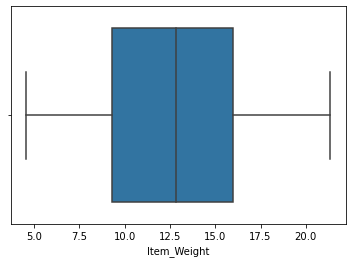

In [258]:
sns.boxplot(ds['Item_Weight'])

As we see there is no outlier in Item Weight we will replace by its mean

In [259]:
ds_test['Item_Weight'].fillna(ds_test['Item_Weight'].mean(), inplace=True)

In [260]:
ds_test.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [261]:
ds_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


SO as outlet size is a Object type of data we will replace it by using mode method

In [262]:
ds_test['Outlet_Size'].mode()

0    Medium
dtype: object

We can see that the mode value of outlet column is Medium so we will use Medium to replace all the Nan values

In [263]:
ds_test['Outlet_Size'].fillna('Medium', inplace=True)

In [264]:
ds_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

so here we can see that we have fixed all the missing values

We will perform the same operations that we have done to the train data

In [265]:
ds_test['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [266]:
cat_col = []
for x in ds_test.dtypes.index:
    if ds_test.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [267]:
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [268]:
for col in cat_col:
    print(col)
    print(ds_test[col].value_counts())
    print()

Item_Fat_Content
Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

Item_Type
Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: Item_Type, dtype: int64

Outlet_Size
Medium    3468
Small     1592
High       621
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    2233
Tier 2    1856
Tier 1    1592
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    3717
Grocery Store         722
Supermarket Type3     624
Supermarket Type2     618
Name: Outlet_Type, dtype: int64



In [269]:
# combine item fat content
ds_test['Item_Fat_Content'] = ds_test['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
ds_test['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

### Creating New Attribute 

In [270]:
ds_test['New_Item_Type'] = ds_test['Item_Identifier'].apply(lambda x: x[:2])
ds_test['New_Item_Type']

0       FD
1       FD
2       NC
3       FD
4       FD
        ..
5676    FD
5677    FD
5678    NC
5679    FD
5680    FD
Name: New_Item_Type, Length: 5681, dtype: object

In [271]:
ds_test['New_Item_Type'] = ds_test['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
ds_test['New_Item_Type'].value_counts()

Food              4076
Non-Consumable    1087
Drinks             518
Name: New_Item_Type, dtype: int64

In [272]:
ds_test.loc[ds_test['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
ds_test['Item_Fat_Content'].value_counts()

Low Fat       2581
Regular       2013
Non-Edible    1087
Name: Item_Fat_Content, dtype: int64

In [273]:
ds_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,New_Item_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,Food
1,FDW14,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,Food
2,NCN55,14.600000,Non-Edible,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,Non-Consumable
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1,Food
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,Food


Lets now do Label Encoding and After that One Hot encoding same as we have done to Train Data

In [274]:
le = LabelEncoder()
ds_test['Outlet'] = le.fit_transform(ds_test['Outlet_Identifier'])
cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type']
for col in cat_col:
    ds_test[col] = le.fit_transform(ds_test[col])

In [275]:
ds_test = pd.get_dummies(ds_test, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'])
ds_test.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet,Item_Fat_Content_0,Item_Fat_Content_1,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,FDW58,20.750000,0.007565,13,107.8622,OUT049,1999,9,1,0,...,1,0,0,0,1,0,0,0,1,0
1,FDW14,8.300000,0.038428,4,87.3198,OUT017,2007,2,0,0,...,0,1,0,0,1,0,0,0,1,0
2,NCN55,14.600000,0.099575,11,241.7538,OUT010,1998,0,0,1,...,0,0,1,1,0,0,0,0,0,1
3,FDQ58,7.315000,0.015388,13,155.0340,OUT017,2007,2,1,0,...,0,1,0,0,1,0,0,0,1,0
4,FDY38,12.695633,0.118599,4,234.2300,OUT027,1985,5,0,0,...,0,0,1,0,0,0,1,0,1,0


As we have done with Encoding lets us remove the unwanted columns

In [276]:
ds_test = ds_test.drop(columns=['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year'], axis = 1)

In [277]:
ds_test.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Size_0,Outlet_Size_1,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,20.750000,0.007565,13,107.8622,9,1,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
1,8.300000,0.038428,4,87.3198,2,0,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
2,14.600000,0.099575,11,241.7538,0,0,1,0,0,1,...,0,0,1,1,0,0,0,0,0,1
3,7.315000,0.015388,13,155.0340,2,1,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
4,12.695633,0.118599,4,234.2300,5,0,0,1,0,1,...,0,0,1,0,0,0,1,0,1,0


as we have successfully converted out test data as train data now we will go and predict the outlet_sales for test data using our saved model

In [280]:
savedmodel = joblib.load('BigMartSalesProblem.pkl')

In [281]:
savedmodel

RandomForestRegressor(criterion='mae', max_depth=10, n_estimators=200)

In [282]:
Outlet_Sales_Testdata = savedmodel.predict(ds_test)

In [295]:
Outlet_Sales_Testdata = pd.DataFrame(Outlet_Sales_Testdata)

In [296]:
Outlet_Sales_Testdata

,0
0,8.190879
1,8.180136
2,8.148053
3,8.161173
4,8.176458
...,...
5676,8.191468
5677,8.183610
5678,8.151364
5679,8.172761


### From Above we can see the predicted value of the test_data 